# Testy


In [2]:
from collections import Counter
import math

from IPython.display import Image
import numpy as np
from numpy.linalg import inv
import scipy.linalg as la
import scipy.stats as st

In [3]:
from fractions import Fraction
# pozor může být nepřesné
def vystup_zlomky(matrix):
    for i in range(matrix.shape[0]):
        row = ""
        for j in range(matrix.shape[1]):
            row += str(Fraction(matrix[i, j]).limit_denominator())
            row += "\t"
        print(row)

## Základní principy

 - Pokud chceme něco dokázat, tak je to dobré dát do alternativní hypotézy.
 - Zamítneme $H_0$, ačkoli platí – chyba prvního druhu.
 - Nezamítneme $H_0$, ačkoli neplatí a ve skutečnosti platí $H_A$ – chyba druhého druhu
 - Hypotézu $H_0$ tedy volíme tak, aby chyba 1. druhu byla závažnější než chyba 2. druhu.
 - Je-li pak výsledkem testu zamítnutí H0, víme, že HA platí s pravděpodobností alespon 1 - alfa.
 - Čím vetší alfa, tím víc budu zamítat.
 - Chceme, aby pravděpodobnost chyby 1. druhu byla nejvýše rovna zvolené hodnotě $\alpha$, kterou nazýváme hladinou významnosti testu.
 - $p$-value = nejnižší hladina $\alpha$, na které ještě zamítám
    - když je 1 - nezamítám nikdy, když je 0 zamítám vždy
    - pokud je p-value hodně nízká, máme důvod si věřit že nulová hypotéza
    - Je-li p-hodnota menší než naše požadovaná hladina významnosti alfa, zamítáme H0.


## Testování pomocí intervalů spolehlivosti
- Zamítáme hypotézu H0 pokud, mí0 neleží v intervalu

## Jaký test zvolit

- Jednovýběrový
    - Jeden set dat.
    - Porovnává se pouze střední hodnota nebo rozptyl
    - Např. točí hospoda podmírák?
- Dvouvýběrový
    - Dva sety dat ($X$ o délce $|X| = n$ a $Y$ o délce $|Y| = m$).
    - Např. točení piva v dvou hospodách. (nezávislé)
- Párový
    - Dva sety dat a data spolu souvisí ($X, Y$ kde délka $|X| = |Y|$).
    - Např. body před a po kurzu.
- Kontingenční tabulka
    - Testování nezávislosti.
    - Zadané tabulkou.
    - Např. ne/spokojenost call centra. 
- Test dobré shody
    - Testování nezávislosti.
    - Biny.
    - Neřeší pořadí (např. hodů hlava/orel).
    - Např. pochází data z rovnoměrného rozdělení?
- Bloky
    - Testování nezávislosti.
    - Řeší pořadí (např. hodů hlava/orel).

## Kritický obor

Pokud platí podmínka **kritického oboru**, pak **zamítáme $H_0$** ve prospěch $H_A$. Pokud neplatí, pak **nezamítáme $H_0$**.

## Basic vzorečky

### Výběrový průměr

$$\overline{X}_n = \dfrac{1}{n}\sum_{i=1}^nX_i$$

## Výběrový rozptyl

$$s_n^2 = s_X^2 = \dfrac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X}_n)^2$$

## Výběrová směrodatná odchylka

$$s_n = \sqrt{s_n^2}$$



In [3]:
def vyberovy_prumer(x):
    #Xn = sum(x) / len(x)
    return np.mean(x)

def vyberovy_rozptyl(x):
    #sn2 = sum( (x-np.mean(x))**2 / (len(x) - 1) )
    return np.var(x, ddof = 1)

def vyberova_smerodatna_odchylka(x):
    #sn = np.sqrt(sn2)
    return np.std(x, ddof = 1)

In [4]:
_data = np.array([-1.5,0.5,0.5,1.5,-1.5,0.5,-2.5,-1.5])

print("Výběrový průměr", vyberovy_prumer(_data))
print("Výběrový rozptyl", vyberovy_rozptyl(_data))
print("Výběrová směrodatná odchylka", vyberova_smerodatna_odchylka(_data))


Výběrový průměr -0.5
Výběrový rozptyl 2.0
Výběrová směrodatná odchylka 1.4142135623730951


# Jednovýběrový t-test

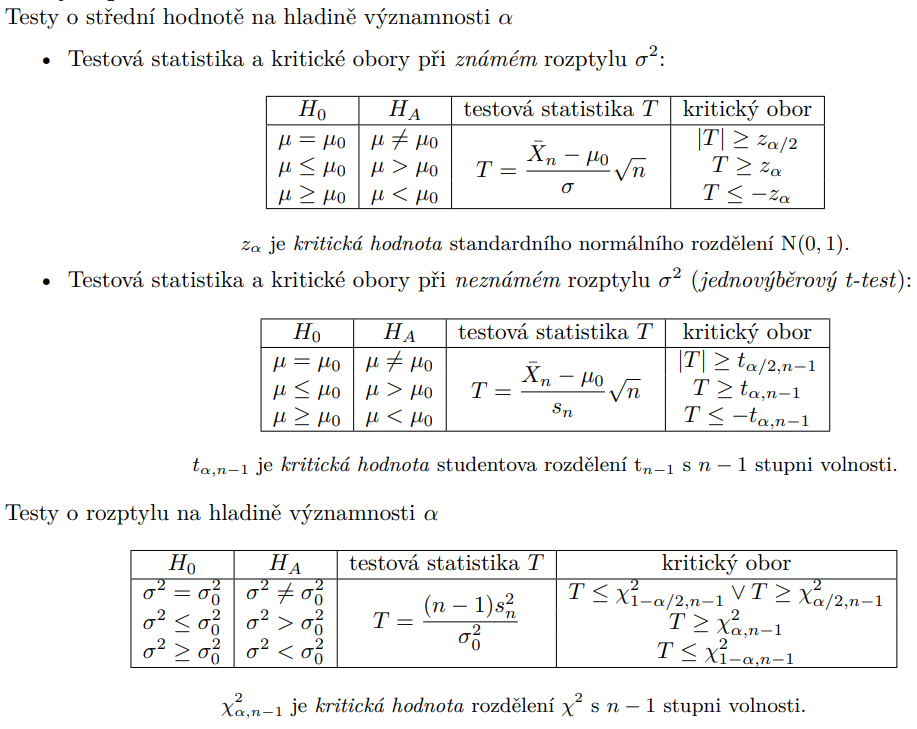

In [5]:
Image(filename='imgs/jednovyberovy_ttest.png') 

### Známý rozptyl

$z_\alpha$ můžeme aproximovat hodnotou $t_\alpha$ v $+\infty$. (pokud koukáte do tabulek)

In [9]:
# DATA

# TODO: NASTAVIT
x = np.array([0.510, 0.462, 0.451, 0.466, 0.491, 0.503, 0.475, 0.487, 0.512, 0.505])
#x = np.array([0] * 15 + [1] * 10)
mu0 = 0.5
alpha = 0.05

# vypočítaná data
n = len(x)
Xn = sum(x)/n # np.mean(x)
ro2 = 1/4
ro = np.sqrt(ro2) # np.std(x, ddof = 1)
print('Xn = ', Xn, ", ro^2 = ", ro2, ", ro = ", ro, ", n = ", n , sep = "")

Xn = 0.4862, ro^2 = 0.25, ro = 0.5, n = 10


#### a) $H_0: \mu = 0.5$ vs. $H_A: \mu \neq 0.5$

In [11]:
# RUČNĚ

T = (Xn - mu0)/ro*np.sqrt(n)
z = st.norm.isf(alpha/2) # tabulky
print("T = ", T, ", z = ", z)
print("|T| >= z : Zamítám" if np.abs(T) >= z else "|T| < z : Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'two-sided')
print(_res)
p = _res[1]
print("alpha > p :Zamítám" if alpha > p else " alpha <= p :Nezamítám")

T =  -0.08727886342064714 , z =  1.9599639845400545
|T| < z : Nezamítám
Ttest_1sampResult(statistic=-2.00828948526515, pvalue=0.07553620919267605)
 alpha <= p :Nezamítám


#### b) $H_0: \mu \geq 0.5$ vs. $H_A: \mu < 0.5$

In [8]:
# RUČNĚ

T = (Xn - mu0)/ro*np.sqrt(n)
z = st.norm.isf(alpha) # tabulky
print("T = ", T, ", z = ", z)
print("T <= -z : Zamítám" if T <= -z else "T > -z : Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'less')
print(_res)
p = _res[1]
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T =  -0.9999999999999998 , z =  1.6448536269514729
T > -z : Nezamítám
Ttest_1sampResult(statistic=-0.9999999999999998, pvalue=0.16364344063989272)
alpha <= p : Nezamítám


#### c) $H_0: \mu \leq 0.5$ vs. $H_A: \mu \gt 0.5$

In [9]:
# RUČNĚ

T = (Xn - mu0)/ro*np.sqrt(n)
z = st.norm.isf(alpha) # tabulky
print("T = ", T, ", z = ", z)
print("T >= z : Zamítám" if T >= z else "T < z : Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'greater')
print(_res)
p = _res[1]
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T =  -0.9999999999999998 , z =  1.6448536269514729
T < z : Nezamítám
Ttest_1sampResult(statistic=-0.9999999999999998, pvalue=0.8363565593601072)
alpha <= p : Nezamítám


### Neznámý rozptyl


In [37]:
# DATA

# TODO: NASTAVIT
#x = np.array([0.510, 0.462, 0.451, 0.466, 0.491, 0.503, 0.475, 0.487, 0.512, 0.505])
#x = np.array([0] * 15 + [1] * 10)
mu0 = 5
alpha = 0.05

# vypočítaná data
n = 10 #len(x)
Xn = 5.3 #sum(x)/n # np.mean(x)
sn2 = 0.6325 #sum((x-Xn)**2/(n-1)) # np.var(x, ddof = 1)
sn = np.sqrt(sn2) # np.std(x, ddof = 1)
print('Xn = ', Xn, ", sn^2 = ", sn2, ", sn = ", sn, ", n = ", n , sep = "")

Xn = 5.3, sn^2 = 0.6325, sn = 0.7952986860293433, n = 10


#### a) $H_0: \mu = 0.5$ vs. $H_A: \mu \neq 0.5$

In [11]:
# RUČNĚ

T = (Xn - mu0)/sn*np.sqrt(n)
t = st.t.isf(alpha/2, n-1) # tabulky
print("T = ", T, ", t = ", t)
print("|T| >= t : Zamítám" if np.abs(T) >= t else "|T| < t : Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'two-sided')
print(_res)
p = _res[1]
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T =  -0.9999999999999996 , t =  2.063898561628021
|T| < t : Nezamítám
Ttest_1sampResult(statistic=-0.9999999999999998, pvalue=0.32728688127978545)
alpha <= p : Nezamítám


#### b) $H_0: \mu \geq 0.5$ vs. $H_A: \mu < 0.5$

In [38]:
# RUČNĚ

T = (Xn - mu0)/sn*np.sqrt(n)
t = st.t.isf(alpha, n-1) # tabulky
p = st.t.cdf(T,n-1)
print("T = ", T, ", t = ", t)
print("T <= -t : Zamítám" if T <= -t else "T > -t : Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'less')
print(_res)
p = _res[1]
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T =  1.1928641587313158 , t =  1.8331129326536337
T > -t : Nezamítám
Ttest_1sampResult(statistic=0.0, pvalue=0.5)
alpha <= p : Nezamítám


#### c) $H_0: \mu \leq 0.5$ vs. $H_A: \mu \gt 0.5$

In [39]:
# RUČNĚ

T = (Xn - mu0)/sn*np.sqrt(n)
t = st.t.isf(alpha, n-1) # tabulky
print("T = ", T, ", t = ", t)
print( "T >= t : Zamítám" if T >= t else "T < t : Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'greater')
print(_res)
p = _res[1]
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T =  1.1928641587313158 , t =  1.8331129326536337
T < t : Nezamítám
Ttest_1sampResult(statistic=0.0, pvalue=0.5)
alpha <= p : Nezamítám


# Dvouvýběrový t-test

Stupně volnosti $df = n+m−2$ $n,m$ délky datasetů.

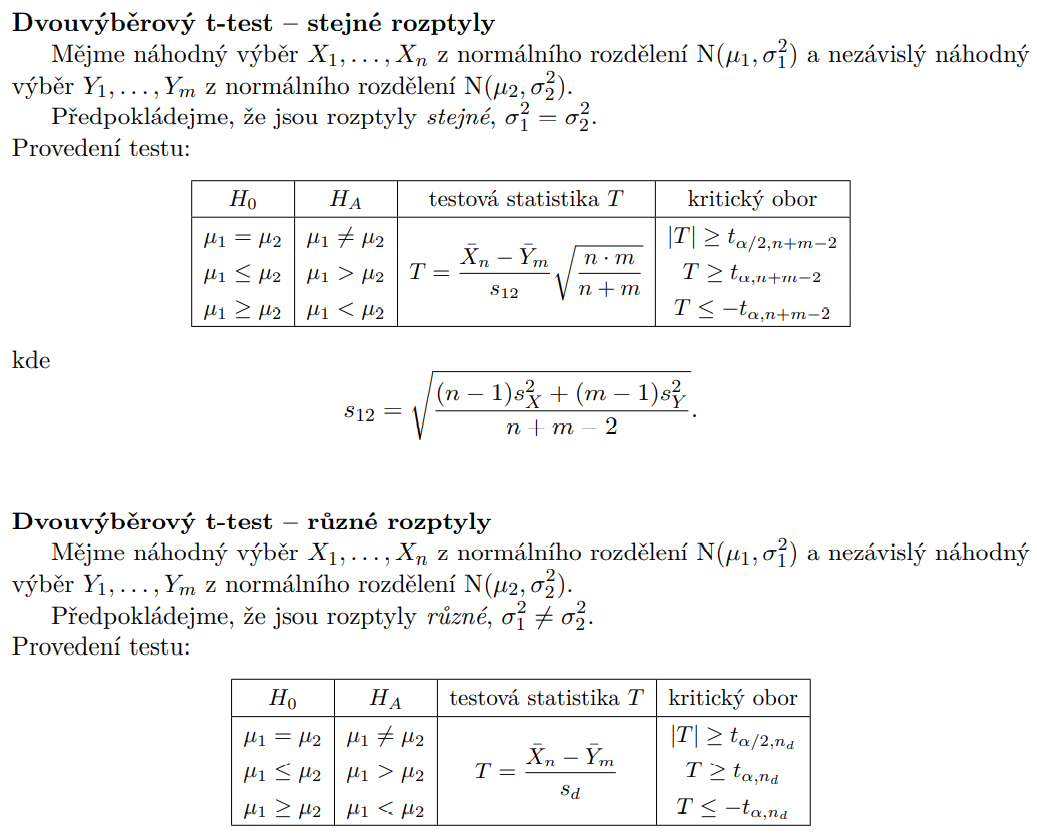

In [14]:
Image(filename='imgs/dvouvyberovy_ttest.png') 

In [27]:
# DATA

# TODO: NASTAVIT
x = np.array([3, 2, 6, 5, 7, 6, 5, 5, 6])
y = np.array([5,5,5,4,9,10,6,3,7])
alpha = 0.05

# vypočítaná data
n = len(x)
m = len(y)
Xn = np.mean(x)
Ym = np.mean(y)
sX2 = np.var(x, ddof=1)
sY2 = np.var(y, ddof=1)
sX = np.std(x, ddof=1)
sY = np.std(y, ddof=1)
print('Xn = ', Xn, ", sX = ", sX, ", n = ", n , sep = "")
print('Ym = ', Ym, ", sY = ", sY, ", m = ", m , sep = "")

Xn = 5.0, sX = 1.5811388300841898, n = 9
Ym = 6.0, sY = 2.29128784747792, m = 9


### Různé rozptyly - není důvod předpokládat, že by byly stejné

#### a) $H_0: \mu_X = \mu_Y$ vs. $H_A: \mu_X \neq \mu_Y$

In [28]:
# RUČNĚ

sd2 = sX2/n + sY2/m
nd = sd2**2/((sX2/n)**2/(n-1) + (sY2/m)**2/(m-1))
T = (Xn - Ym)/np.sqrt(sd2)
t = st.t.isf(alpha/2,nd) # tabulky
print("T = ", T, ", t = ", t , ", nd = ", nd, sep="")
print("|T| >= t : Zamítám" if np.abs(T) >= t else "|T| < t : Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'two-sided', equal_var = False)
print(_res)
p = _res[1]
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T = -1.0776318121606494, t = 2.141806829906443, nd = 14.210720887245841
|T| < t : Nezamítám
Ttest_indResult(statistic=-1.0776318121606494, pvalue=0.29915183576875143)
alpha <= p : Nezamítám


#### b) $H_0: \mu_X \geq \mu_Y$ vs. $H_A: \mu_X < \mu_Y$

In [36]:
# RUČNĚ

sd2 = sX2/n + sY2/m
nd = sd2**2/((sX2/n)**2/(n-1) + (sY2/m)**2/(m-1))
T = (Xn - Ym)/np.sqrt(sd2)
t = st.t.isf(alpha,nd) # tabulky
print("T = ", T, ", t = ", t , ", nd = ", nd, sep="")
print("T <= -t :Zamítám" if T <= -t else "T > -t :Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'less', equal_var = False)
print(_res)
p = _res[1]
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T = -1.0776318121606494, t = 1.7594665322438063, nd = 14.210720887245841
T > -t :Nezamítám
Ttest_indResult(statistic=-1.0776318121606494, pvalue=0.14957591788437571)
alpha <= p : Nezamítám


#### c) $H_0: \mu_X \leq \mu_Y$ vs. $H_A: \mu_X \gt \mu_Y$

In [30]:
# RUČNĚ

sd2 = sX2/n + sY2/m
nd = sd2**2/((sX2/n)**2/(n-1) + (sY2/m)**2/(m-1))
T = (Xn - Ym)/np.sqrt(sd2)
t = st.t.isf(alpha,nd) # tabulky
print("T = ", T, ", t = ", t , ", nd = ", nd, sep="")
print("T >= t : Zamítám" if T >= t else "T < t : Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'greater', equal_var = False)
print(_res)
p = _res[1]
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T = -1.0776318121606494, t = 1.7594665322438063, nd = 14.210720887245841
T < t : Nezamítám
Ttest_indResult(statistic=-1.0776318121606494, pvalue=0.8504240821156243)
alpha <= p : Nezamítám


### Shodné rozptyly - je důvod předpokládat shodu, nebo si to otestuji


a) $H_0: \mu_X = \mu_Y$ vs. $H_A: \mu_X \neq \mu_Y$

In [31]:
# RUČNĚ

s12 = np.sqrt(((n-1)*sX2 + (m-1)*sY2)/(n+m-2))
T = (Xn - Ym)/s12*np.sqrt(n*m/(n+m))
t = st.t.isf(alpha/2,n + m - 2) # tabulky
p = 2 * st.t.sf(np.abs(T), n + m - 2)
print("T = ", T, ", t = ", t,", s12 = ", s12, sep="")
print("|T| >= t : Zamítám" if np.abs(T) >= t else "|T| < t Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'two-sided', equal_var = True)
print(_res)
p = _res[1]
print("alpha > p : Zamítám " if alpha > p else "alpha <= p : Nezamítám")

T = -1.0776318121606494, t = 2.1199052992210112, s12 = 1.9685019685029528
|T| < t Nezamítám
Ttest_indResult(statistic=-1.0776318121606494, pvalue=0.29717795845152384)
alpha <= p : Nezamítám


#### b) $H_0: \mu_X \geq \mu_Y$ vs. $H_A: \mu_X < \mu_Y$

In [35]:
# RUČNĚ
s12 = np.sqrt(((n-1)*sX2 + (m-1)*sY2)/(n+m-2))
T = (Xn - Ym)/s12*np.sqrt(n*m/(n+m))
t = st.t.isf(alpha,n+m-2) # tabulky
print("T = ", T, ", t = ", t , ", s12 = ", s12, sep="")
print("T <= -t : Zamítám" if T <= -t else "T > -t : Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'less', equal_var = True)
print(_res)
p = _res[1]
print("alpha > p : Zamítám " if alpha > p else "alpha <= p : Nezamítám")

T = -1.0776318121606494, t = 1.7458836762762404, s12 = 1.9685019685029528
T > -t : Nezamítám
Ttest_indResult(statistic=-1.0776318121606494, pvalue=0.14858897922576192)
alpha <= p : Nezamítám


#### c) $H_0: \mu_X \leq \mu_Y$ vs. $H_A: \mu_X \gt \mu_Y$

In [33]:
# RUČNĚ
s12 = np.sqrt(((n-1)*sX2 + (m-1)*sY2)/(n+m-2))
T = (Xn - Ym)/s12*np.sqrt(n*m/(n+m))
t = st.t.isf(alpha,n+m-2) # tabulky
print("T = ", T, ", t = ", t , ", s12 = ", s12, sep="")
print("T >= t Zamítám" if T >= t else "T < t Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'greater', equal_var = True)
print(_res)
p = _res[1]
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T = -1.0776318121606494, t = 1.7458836762762404, s12 = 1.9685019685029528
T < t Nezamítám
Ttest_indResult(statistic=-1.0776318121606494, pvalue=0.851411020774238)
alpha <= p : Nezamítám


# Párový t-test


Pokud chci $\ge$, používám $p = st.t.cdf(T,n-1)$.

Pokud chci $\le$, používám $p = st.t.cdf(np.abs(T),n-1)$.

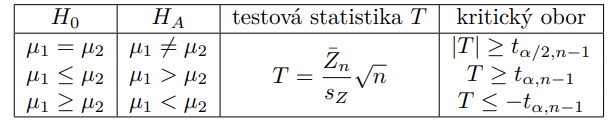

In [22]:
Image(filename='imgs/parovy_ttest.png') 

In [5]:
# DATA

# TODO: NASTAVIT
# x = np.array([20,10,30,5,40])
# y = np.array([35,20,50,10,40])
# z = x - y
z = np.array([-0.12, 0.29, 0.26, -0.11, 0.20, 0.33, -0.20, 0.08, 0.38, 0.60])
alpha = 0.05

# vypočítaná data
n = len(z)
Zn = sum(z)/n # np.mean(x)
sz2 = np.var(z, ddof = 1)
sz = np.std(z, ddof = 1)
print('Zn = ', Zn, ", sz^2 = ", sz2, ", sz = ", sz, ", n = ", n, sep = "")

Zn = 0.17099999999999999, sz^2 = 0.06505444444444444, sz = 0.25505772767051077, n = 10


#### a) $H_0: \mu_x = \mu_y$ vs. $H_A: \mu_x \neq \mu_y$

In [43]:
# RUČNĚ

T = Zn/sz * np.sqrt(n)
t = st.t.isf(alpha/2, n-1) # tabulky
print("T = ", T, ", t = ", t)
print("|T| >= t : Zamítám" if np.abs(T) >= t else "|T| < t : Nezamítám")

# POMOCÍ FUNKCE TTEST

# TODO: POZOR, PŘI ZADANÉM X A Y
_res = st.ttest_rel(x, y, alternative = 'two-sided')
print(_res)
p = _res[1]
print("alpha > p : Zamítám " if alpha > p else "alpha <= p : Nezamítám")

T =  -2.8284271247461903 , t =  2.1318467813362907
|T| >= t : Zamítám
Ttest_relResult(statistic=-2.82842712474619, pvalue=0.04742065558431962)
alpha > p : Zamítám 


 #### b)$H_0: \mu_x \le \mu_y$ vs. $H_A: \mu_x \gt \mu_y$

In [10]:
# RUČNĚ

T = Zn/sz * np.sqrt(n)
t = st.t.isf(alpha, n-1) # tabulky
print("T = ", T, ", t = ", t)
print("T >= t : Zamítám" if T >= t else "T < t : Nezamítám")

# POMOCÍ FUNKCE TTEST

# TODO: POZOR, JEN PŘI ZADANÉM X A Y
# _res = st.ttest_rel(x, y, alternative = 'greater')
# print(_res)
# p = _res[1]
# print("alpha > p : Zamítám " if alpha > p else "alpha <= p : Nezamítám")

T =  2.1201062395856716 , t =  1.8331129326536337
T >= t : Zamítám


#### c) $H_0: \mu_x \ge \mu_y$ vs. $H_A: \mu_x \lt \mu_y$

In [45]:
# RUČNĚ

T = Zn/sz * np.sqrt(n)
t = st.t.isf(alpha, n-1) # tabulky
print("T = ", T, ", t = ", t)
print("T <= -t : Zamítám" if T <= -t else "T > -t : Nezamítám")

# POMOCÍ FUNKCE TTEST

# TODO: POZOR, JEN PŘI ZADANÉM X A Y
_res = st.ttest_rel(x, y, alternative = 'less')
print(_res)
p = _res[1]
print("alpha > p : Zamítám " if alpha > p else "alpha <= p : Nezamítám")

T =  -2.8284271247461903 , t =  1.5332062737131436
T <= -t : Zamítám
Ttest_relResult(statistic=-2.82842712474619, pvalue=0.02371032779215981)
alpha > p : Zamítám 


# Kontingenční tabulka

Aby fungovala asymptotika, je doporučeno, aby $\forall i, j : n\hat{p}_{i\bullet}\hat{p}_{\bullet j} \ge 5$.

Kontingenční tabulka je matice četností.

Stupně volnosti $df = (r-1)\cdot(c-1)$, kde $r$ je počet řádků a $c$ je počet sloupců sloučené tabulky.


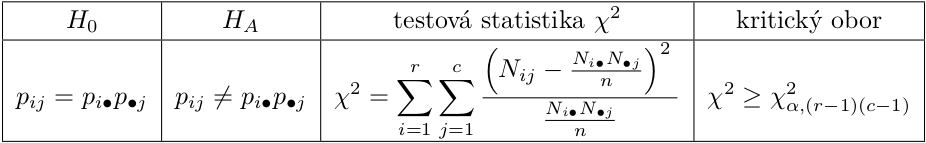

In [27]:
Image(filename='imgs/kontingencni_tabulka.png') 

In [28]:
# DATA

# TODO: nastavit
# skutečné četnosti
# x\y
Nij = np.matrix([
    [85, 15],
    [95, 5]
])
alpha = 0.10

# vypočítaná data
n = np.sum(Nij)
print("n =", n)
print("Nij =")
print(Nij)
print("Hezky:")
vystup_zlomky(Nij)

n = 200
Nij =
[[85 15]
 [95  5]]
Hezky:
85	15	
95	5	


In [29]:
# RUČNĚ

# odhady marginál
p_i = np.sum(Nij, axis = 1)/n
p_j = np.sum(Nij, axis = 0)/n
print("pi_ =\n", p_i)
print("p_j =\n", p_j)

# teoretické četnosti
pipj = np.matmul(p_i,p_j)
print("pipj =\n",pipj)
npipj = n * pipj
print("npipj =\n",npipj)


print("Po sloučení")

# odhady marginál
pi_ = np.sum(Nij, axis = 1)/n
p_j = np.sum(Nij, axis = 0)/n
print("pi_ =\n", pi_)
print("p_j =\n", p_j)
# teoretické četnosti
pipj = np.matmul(pi_,p_j)
print("pipj =\n",pipj)
npipj = n * pipj
print("npipj =\n",npipj)

# testová statistika
Chi2 = np.sum(np.square(Nij - npipj)/npipj)
print("Chi2 =", Chi2)
# kritická hodnota
df = (np.size(Nij,axis =0) - 1)*(np.size(Nij,axis =1) - 1)
print("df =",df)
chi2 = st.chi2.isf(alpha,df)
print("chi2 =", chi2)

# p-hodnota
p = st.chi2.sf(np.abs(Chi2),df) # = 1-st.chi2.cdf(Chi2,df)
print("p =", p)

print("...")
print("Chi2 act >= chi2 exp: Zamítám" if Chi2 >= chi2 else "Chi2 act < chi2 exp: Nezamítám")
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

pi_ =
 [[0.5]
 [0.5]]
p_j =
 [[0.9 0.1]]
pipj =
 [[0.45 0.05]
 [0.45 0.05]]
npipj =
 [[90. 10.]
 [90. 10.]]
Po sloučení
pi_ =
 [[0.5]
 [0.5]]
p_j =
 [[0.9 0.1]]
pipj =
 [[0.45 0.05]
 [0.45 0.05]]
npipj =
 [[90. 10.]
 [90. 10.]]
Chi2 = 5.555555555555555
df = 1
chi2 = 2.70554345409542
p = 0.01842212545409897
...
Chi2 act >= chi2 exp: Zamítám
alpha > p : Zamítám


In [30]:
# POMOCÍ FUNKCE

Chi2, p, df, _ = st.chi2_contingency(Nij, correction = False)
print("Chi2 =", Chi2)
print("df =", df)
print("p =", p)
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

Chi2 = 5.555555555555555
df = 1
p = 0.01842212545409897
alpha > p : Zamítám


# Test dobré shody

Je třeba pamatovat na to, že test $\chi^2$ je asymptotický a proto ho lze použít jen pro dostatečně velký rozsah výběru $n$. Obvykle se uvádí, že musí platit $n \cdot p_i \ge 5$ pro každé $i$.

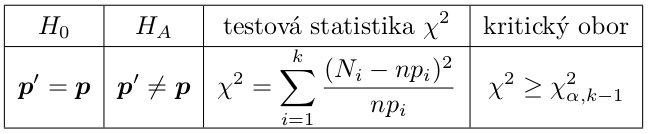

In [31]:
Image(filename='imgs/test_dobre_shody.png')

In [50]:
# DATA

# TODO: nastavit
x = np.array([0,0,5,3,2,5,4,1,2,1,3,3,4,3,0])
#x = np.array([0] * 15 + [1] * 10)
k = 3 # počet binů
alpha = 0.05

# vypočítaná data
n = len(x)
# četnosti
Ni, edges = np.histogram(x, bins = k, range = (0,5), density = None)
n = np.sum(Ni)
print("Edges =" ,edges)
print("n = ", n, ", Ni = ", Ni, sep="")

Edges = [0.         1.66666667 3.33333333 5.        ]
n = 15, Ni = [5 6 4]


In [51]:
# RUČNĚ

# teoretické četnosti
pi = np.ones(k) * 1/k
npi = n * pi
print("pi =", pi)
print("npi =", npi)

# testová statistika
Chi2 = sum((Ni - npi)**2/npi)
print("Chi2 =", Chi2)

# kritická hodnota
df = k-1
chi2 = st.chi2.isf(alpha,df) # tabulky
print("chi2 =", chi2)

# p-hodnota
p = st.chi2.sf(Chi2,df) # = 1-st.chi2.cdf(Chi2,df)
print("p =", p)

print("...")
print("Chi2 actual >= chi2 expected: Zamítám" if Chi2 >= chi2 else "Chi2 actual < chi2 expected: Nezamítám")
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

pi = [0.33333333 0.33333333 0.33333333]
npi = [5. 5. 5.]
Chi2 = 0.4
chi2 = 5.991464547107983
p = 0.8187307530779818
...
Chi2 actual < chi2 expected: Nezamítám
alpha <= p : Nezamítám


In [34]:
# pomocí funkce
_res = st.chisquare(Ni,npi)
print(_res)
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")


Power_divergenceResult(statistic=5.2, pvalue=0.07427357821433386)
alpha <= p : Nezamítám


# Bloky

$z_\alpha$ můžeme aproximovat hodnotou $t_\alpha$ v $+\infty$.

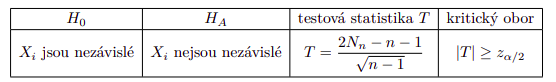

In [35]:
Image(filename='imgs/bloky_dle_stredni_hodnoty.png')

In [36]:
# DATA

# TODO: NASTAVIT
Nn = 10
n = 20
alpha = 0.1

# vypočítaná data
T = (2*Nn - n - 1)/math.sqrt(n-1)
z = st.norm.isf(alpha/2) # tabulky
p = 2 * st.norm.sf(np.abs(T))
print("T = ", T, ", z = ", z)
print("p = ", p)

print("...")
print("|T| >= z : Zamítám" if np.abs(T) >= z else "|T| < z : Nezamítám")
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T =  -0.22941573387056174 , z =  1.6448536269514729
p =  0.8185458083820434
...
|T| < z : Nezamítám
alpha <= p : Nezamítám


## Bloky nahoru/dolů

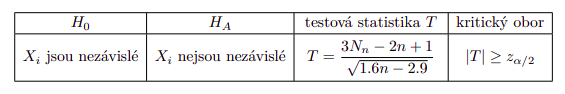

In [37]:
Image(filename='imgs/bloky_dle_monotonie.png')

In [38]:
# DATA

# TODO: NASTAVIT
Nn = 20
n = 30
alpha = 0.1

# vypočítaná data
T = (3*Nn - 2*n + 1)/math.sqrt(1.69*n-2.9)
z = st.norm.isf(alpha/2) # tabulky
p = 2 * st.norm.sf(np.abs(T))
print("T = ", T, ", z = ", z)
print("p = ", p)

print("...")
print("|T| >= z : Zamítám" if np.abs(T) >= z else "|T| < z : Nezamítám")
print("alpha > p : Zamítám" if alpha > p else "alpha <= p : Nezamítám")

T =  0.14463921353509293 , z =  1.6448536269514729
p =  0.8849957348451949
...
|T| < z : Nezamítám
alpha <= p : Nezamítám


### Kritická hodnota normálního rozdělení


In [39]:
alfa = 0.1
z = st.norm.isf(alfa/2) # pozor pro z_alfa/2
print("Kritická hodnota normálního rozdělení v bodě alfa/2 =", alfa/2, "=", z)

Kritická hodnota normálního rozdělení v bodě alfa/2 = 0.05 = 1.6448536269514729


### Zjištění p-hodnoty

In [40]:
T = 1.64485 # statistika co ti vyšla
p = st.norm.sf(np.abs(T))
print("Pro testovou statistiku T =", T, "je p-hodnota", p*2) # pozor pro Z_alpha/2

Pro testovou statistiku T = 1.64485 je p-hodnota 0.1000007481381571


## Příklady
- Slepice (jednovýběrový test)

## Kvízy

## Obecné
### 1.
<img src="imgs/kviz/testy/hypoteza.png">

### 2.
<img src="imgs/kviz/testy/hypoteza_rozhodovani.png">

## Testy dobré shody (multinomické rozdělení)
### 1.
<img src="imgs/kviz/testy/pearson_stat.png">

### 2.
<img src="imgs/kviz/testy/test_dobre_shody.png">


## Dvouvýběrový a Párový T-test
### 1.
<img src="imgs/kviz/testy/dvouvyberovy_vs_parovy.png">

### 2.
<img src="imgs/kviz/testy/ttest.png">

## Intervaly
### 1.
<img src="imgs/kviz/testy/intervaly.png">